In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# la liste de codes postaux n'est jamais utilisée et ne comporte pas les banlieues des autres villes que Paris
code_postal_ville = [
    #Ile-de-France
    "75000",
    "75001", "75002", "75003", "75004", "75005", "75006", "75007", "75008", "75009", "75010",
    "75011", "75012", "75013", "75014", "75015", "75016", "75017", "75018", "75019", "75020",
    "92100", "92110", "92120", "92130", "92140", "92150", "92160", "92170", "92190",
    "92200", "92210", "92220", "92230", "92240", "92250", "92260", "92270", "92290",
    "92300", "92310", "92320", "92330", "92340", "92350", "92360", "92370", "92380", "92390",   "92400", "92410", "92420", "92430", "92440", "92450", "92460", "92470", "92480", "92490",
    "92500", "92510", "92520", "92530", "92540", "92550", "92560", "92570", "92580", "92590",
    "92600", "92610", "92620", "92630", "92640", "92650", "92660", "92670", "92680", "92690",
    "92700", "92710", "92720", "92730", "92740", "92750", "92760", "92770", "92780", "92790",
    "92800", "92810", "92820", "92830", "92840", "92850", "92860", "92870", "92880", "92890",
    "92900", "92910", "92920", "92930", "92940", "92950", "92960", "92970", "92980", "92990",
    "93000", "93100", "93200", "93300", "93400", "93500", "93600", "93700", "93800", "93900",
    "94000", "94100", "94200", "94300", "94400", "94500", "94600", "94700", "94800", "94900",
    
    #Marseille
    "13000", "13001", "13002", "13003", "13004", "13005", "13006", "13007", "13008", "13009",
    "13010", "13011", "13012", "13013",
    
    #Aix-en-Provence
    "13080", "13100", "13190", "13290", "13540", "13590", "13700", "13800", "13990",
    
    #Lyon
    "69000", "69001", "69002", "69003", "69004", "69005", "69006", "69007", "69008", "69009",
    "69100", "69200", "69300", "69400", "69500", "69600", "69700", "69800", "69900",
    
    #Lille
    "59000", "59100", "59200", "59300", "59400", "59500", "59600", "59700", "59800", "59900",
    
    #Bordeaux
    "33000", "33100", "33200", "33300", "33400", "33500", "33600", "33700", "33800", "33900",
    
    #Toulouse
    "31000", "31100", "31200", "31300", "31400", "31500", "31600", "31700", "31800", "31900",
    
    #Nice
    "06000", "06100", "06200", "06300", "06400", "06500", "06600", "06700", "06800", "06900",
    
    #Nantes
    "44000", "44100", "44200", "44300", "44400", "44500", "44600", "44700", "44800", "44900",
    
    #Strasbourg
    "67000", "67100", "67200", "67300", "67400", "67500", "67600", "67700", "67800", "67900",
    
    #Montpellier
    "34000", "34100", "34200", "34300", "34400", "34500", "34600", "34700", "34800", "34900",
    
    #Rennes
    "35000", "35100", "35200", "35300", "35400", "35500", "35600", "35700", "35800", "35900",
    
    #Grenoble
    "38000", "38100", "38200", "38300", "38400", "38500", "38600", "38700", "38800", "38900",
    
    #Dijon
    "21000", "21100", "21200", "21300", "21400", "21500", "21600", "21700", "21800", "21900",   
    
    #Angers
    "49000", "49100", "49200", "49300", "49400", "49500", "49600", "49700", "49800", "49900",
    
    #Rennes
    "35000", "35100", "35200", "35300", "35400", "35500", "35600", "35700", "35800", "35900",
    
    #Le Havre
    "76000", "76100", "76200", "76300", "76400", "76500", "76600", "76700", "76800", "76900",
    
    #Saint-Étienne
    "42000", "42100", "42200", "42300", "42400", "42500", "42600", "42700", "42800", "42900",
]



In [2]:
# Load the dataset
# Split in chunks to avoid memory error and process chunk by chunk

chunks = pd.read_csv('Data/Valeur_Fonciere.csv', chunksize=1000000, low_memory=False)

# Collect processed chunks into a list
chunk_list = []

for chunk in chunks:
    print("Processing a new chunk...")
    chunk_list.append(chunk)

# Concatenate all chunks into a single DataFrame
df = pd.concat(chunk_list, ignore_index=True)

# Display basic information about the dataset
print(df.info())
print(df.head())

Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
Processing a new chunk...
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20133668 entries, 0 to 20133667
Data columns (total 40 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id_mutation                   object 
 1   date_mutation                 object 
 2   numero_disposition            int64  
 3   nature_mutation               object 
 4   valeur_fonciere               float64
 5   adresse_numero                flo

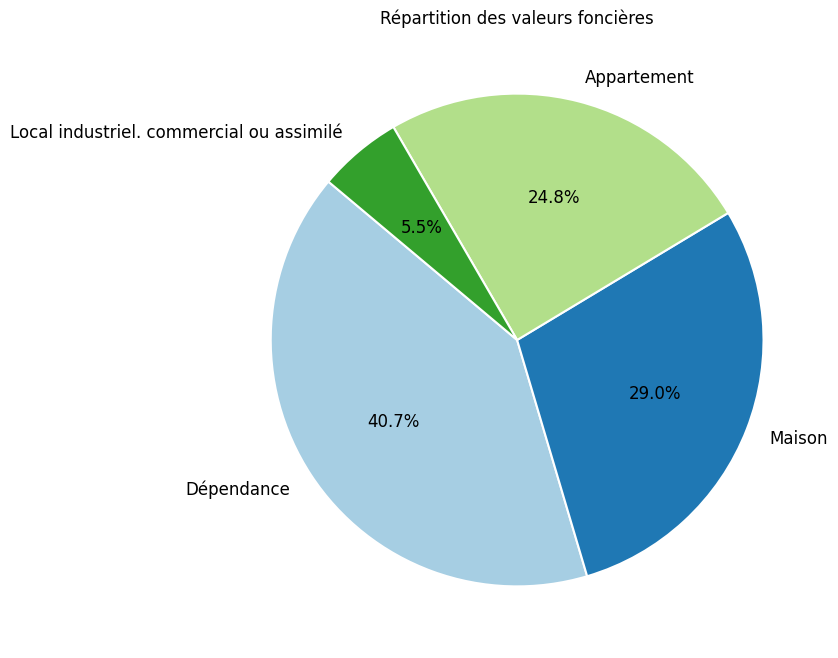

In [ ]:
# Camembert sur la répartition des valeurs foncières
valeur_fonciere_counts = df['type_local'].value_counts()
couleurs = plt.cm.Paired.colors 
plt.figure(figsize=(8, 8))
plt.pie(
    valeur_fonciere_counts,
    labels=valeur_fonciere_counts.index,
    autopct='%1.1f%%',
    startangle=140,
    colors=couleurs,
    wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
    textprops={'fontsize': 12}
)
plt.title('Répartition des valeurs foncières', fontsize=16, fontweight='bold', pad=20)
plt.show()

In [4]:
df.head(5)

,id_mutation,date_mutation,numero_disposition,nature_mutation,valeur_fonciere,adresse_numero,adresse_suffixe,adresse_nom_voie,adresse_code_voie,code_postal,...,type_local,surface_reelle_bati,nombre_pieces_principales,code_nature_culture,nature_culture,code_nature_culture_speciale,nature_culture_speciale,surface_terrain,longitude,latitude
0,2020-1,2020-01-07,1,Vente,8000.0,NaN,NaN,FORTUNAT,B063,1250.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1061.0,5.323532,46.171941
1,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,TERRES DES CINQ SAULES,B124,1290.0,...,NaN,NaN,NaN,BT,taillis simples,NaN,NaN,85.0,4.893454,46.251858
2,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,BOIS DU CHAMP RION,B006,1290.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1115.0,4.900210,46.235277
3,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,EN COROBERT,B025,1290.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1940.0,4.882112,46.246554
4,2020-2,2020-01-02,1,Vente,2175.0,NaN,NaN,TERRES DES CINQ SAULES,B124,1290.0,...,NaN,NaN,NaN,T,terres,NaN,NaN,1148.0,4.894481,46.251841


In [5]:

df.dropna(subset=['code_postal'], inplace=True)
columns_to_keep = [ 'nature_mutation', 'valeur_fonciere', 'code_postal', 'surface_reelle_bati', 'nombre_pieces_principales', 'type_local', 'longitude', 'latitude', 'date_mutation']
df_Etudiants = df
df_Etudiants = df_Etudiants[[col for col in df_Etudiants.columns if col.lower() in columns_to_keep]]
df_Etudiants.head(5)

KeyboardInterrupt: 

In [ ]:
# Type de local 'Appartement'

df_Etudiants = df_Etudiants[df_Etudiants['type_local'] == 'Appartement']
df_Etudiants = df_Etudiants[(df_Etudiants['valeur_fonciere'] > 0) & (df_Etudiants['valeur_fonciere'] < 150000)]
df_Etudiants = df_Etudiants[df_Etudiants['nombre_pieces_principales'] < 3]
df_Etudiants.info()
df_Etudiants.head(5)


<class 'pandas.core.frame.DataFrame'>
Index: 676162 entries, 14 to 20133493
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_mutation              676162 non-null  object 
 1   nature_mutation            676162 non-null  object 
 2   valeur_fonciere            676162 non-null  float64
 3   code_postal                676162 non-null  float64
 4   type_local                 676162 non-null  object 
 5   surface_reelle_bati        676161 non-null  float64
 6   nombre_pieces_principales  676162 non-null  float64
 7   longitude                  668147 non-null  float64
 8   latitude                   668147 non-null  float64
dtypes: float64(6), object(3)
memory usage: 51.6+ MB


,date_mutation,nature_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
14,2020-01-06,Vente,54800.0,1000.0,Appartement,32.0,1.0,5.229862,46.206670
22,2020-01-10,Vente,53650.0,1270.0,Appartement,50.0,2.0,5.347202,46.388082
23,2020-01-10,Vente,53650.0,1270.0,Appartement,45.0,2.0,5.347202,46.388082
60,2020-01-08,Vente,70000.0,1000.0,Appartement,45.0,2.0,5.225508,46.204052
160,2020-01-20,Vente,67000.0,1000.0,Appartement,38.0,2.0,5.215043,46.207717


In [ ]:
df_Etudiants.dropna(subset=['valeur_fonciere'], inplace=True)
df_Etudiants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 676162 entries, 14 to 20133493
Data columns (total 9 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_mutation              676162 non-null  object 
 1   nature_mutation            676162 non-null  object 
 2   valeur_fonciere            676162 non-null  float64
 3   code_postal                676162 non-null  float64
 4   type_local                 676162 non-null  object 
 5   surface_reelle_bati        676161 non-null  float64
 6   nombre_pieces_principales  676162 non-null  float64
 7   longitude                  668147 non-null  float64
 8   latitude                   668147 non-null  float64
dtypes: float64(6), object(3)
memory usage: 51.6+ MB


In [ ]:
prix_m2 = df_Etudiants['valeur_fonciere'] / df_Etudiants['surface_reelle_bati']
df_Etudiants = df_Etudiants.assign(prix_m2=prix_m2)
df_Etudiants.head(5)

,date_mutation,nature_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,prix_m2
14,2020-01-06,Vente,54800.0,1000.0,Appartement,32.0,1.0,5.229862,46.206670,1712.500000
22,2020-01-10,Vente,53650.0,1270.0,Appartement,50.0,2.0,5.347202,46.388082,1073.000000
23,2020-01-10,Vente,53650.0,1270.0,Appartement,45.0,2.0,5.347202,46.388082,1192.222222
60,2020-01-08,Vente,70000.0,1000.0,Appartement,45.0,2.0,5.225508,46.204052,1555.555556
160,2020-01-20,Vente,67000.0,1000.0,Appartement,38.0,2.0,5.215043,46.207717,1763.157895


In [ ]:
df_Etudiants = df_Etudiants[(df_Etudiants['prix_m2'] > 1000) & (df_Etudiants['prix_m2'] < 15000)] #pourquoi moins de 1000 c'est pas impossible je crois
df_Etudiants.head(5)

,date_mutation,nature_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,prix_m2
14,2020-01-06,Vente,54800.0,1000.0,Appartement,32.0,1.0,5.229862,46.206670,1712.500000
22,2020-01-10,Vente,53650.0,1270.0,Appartement,50.0,2.0,5.347202,46.388082,1073.000000
23,2020-01-10,Vente,53650.0,1270.0,Appartement,45.0,2.0,5.347202,46.388082,1192.222222
60,2020-01-08,Vente,70000.0,1000.0,Appartement,45.0,2.0,5.225508,46.204052,1555.555556
160,2020-01-20,Vente,67000.0,1000.0,Appartement,38.0,2.0,5.215043,46.207717,1763.157895


In [ ]:
df_Etudiants['code_postal'] = df_Etudiants['code_postal'].astype(int)
df_Etudiants['code_postal'] = df_Etudiants['code_postal'] * 10
df_Etudiants.head(5)

,date_mutation,nature_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,prix_m2
14,2020-01-06,Vente,54800.0,10000,Appartement,32.0,1.0,5.229862,46.206670,1712.500000
22,2020-01-10,Vente,53650.0,12700,Appartement,50.0,2.0,5.347202,46.388082,1073.000000
23,2020-01-10,Vente,53650.0,12700,Appartement,45.0,2.0,5.347202,46.388082,1192.222222
60,2020-01-08,Vente,70000.0,10000,Appartement,45.0,2.0,5.225508,46.204052,1555.555556
160,2020-01-20,Vente,67000.0,10000,Appartement,38.0,2.0,5.215043,46.207717,1763.157895


In [ ]:
df_Etudiants = df_Etudiants[df_Etudiants['nature_mutation'] == 'Vente'] #qu'est qu'il y a d'autre que vente ? pour savoir si ça peut être intéressant.
df_Etudiants.head(5)
df_Etudiants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614528 entries, 14 to 20133493
Data columns (total 10 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date_mutation              614528 non-null  object 
 1   nature_mutation            614528 non-null  object 
 2   valeur_fonciere            614528 non-null  float64
 3   code_postal                614528 non-null  int64  
 4   type_local                 614528 non-null  object 
 5   surface_reelle_bati        614528 non-null  float64
 6   nombre_pieces_principales  614528 non-null  float64
 7   longitude                  608231 non-null  float64
 8   latitude                   608231 non-null  float64
 9   prix_m2                    614528 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 51.6+ MB


In [ ]:
# Save the cleaned dataset to a new CSV file
df_Etudiants.to_csv('Output/DVF_OUTPUT/Etudiants/Logement_Appartement_Cleaned_Budget.csv', index=False)


In [ ]:
df_Famille = df
df_Famille.dropna(subset=['valeur_fonciere'], inplace=True)
df_Famille.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19784553 entries, 0 to 20133667
Data columns (total 40 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   id_mutation                   object 
 1   date_mutation                 object 
 2   numero_disposition            int64  
 3   nature_mutation               object 
 4   valeur_fonciere               float64
 5   adresse_numero                float64
 6   adresse_suffixe               object 
 7   adresse_nom_voie              object 
 8   adresse_code_voie             object 
 9   code_postal                   float64
 10  code_commune                  object 
 11  nom_commune                   object 
 12  code_departement              object 
 13  ancien_code_commune           float64
 14  ancien_nom_commune            object 
 15  id_parcelle                   object 
 16  ancien_id_parcelle            object 
 17  numero_volume                 object 
 18  lot1_numero              

In [ ]:
df_Famille = df_Famille[(df_Famille['type_local'] == 'Maison') | (df_Famille['type_local'] == 'Appartement')]
df_Famille = df_Famille[(df_Famille['valeur_fonciere'] > 50000) & (df_Famille['valeur_fonciere'] < 150000)]
columns_to_keep = [ 'nature_mutation', 'valeur_fonciere', 'code_postal', 'surface_reelle_bati', 'nombre_pieces_principales', 'type_local', 'longitude', 'latitude', 'date_mutation']
df_Famille = df_Famille[[col for col in df_Famille.columns if col.lower() in columns_to_keep]]
df_Famille.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1831902 entries, 11 to 20133493
Data columns (total 9 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   date_mutation              object 
 1   nature_mutation            object 
 2   valeur_fonciere            float64
 3   code_postal                float64
 4   type_local                 object 
 5   surface_reelle_bati        float64
 6   nombre_pieces_principales  float64
 7   longitude                  float64
 8   latitude                   float64
dtypes: float64(6), object(3)
memory usage: 139.8+ MB


In [ ]:
df_Famille.head(5)

,date_mutation,nature_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude
11,2020-01-09,Vente,72000.0,1270.0,Maison,35.0,2.0,5.350942,46.380918
14,2020-01-06,Vente,54800.0,1000.0,Appartement,32.0,1.0,5.229862,46.206670
22,2020-01-10,Vente,53650.0,1270.0,Appartement,50.0,2.0,5.347202,46.388082
23,2020-01-10,Vente,53650.0,1270.0,Appartement,45.0,2.0,5.347202,46.388082
24,2020-01-13,Vente,97000.0,1000.0,Appartement,92.0,3.0,5.232261,46.199051


In [ ]:
prix_m2 = df_Famille['valeur_fonciere'] / df_Famille['surface_reelle_bati']
df_Famille = df_Famille.assign(prix_m2=prix_m2)
df_Famille.head(5)

,date_mutation,nature_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,prix_m2
11,2020-01-09,Vente,72000.0,1270.0,Maison,35.0,2.0,5.350942,46.380918,2057.142857
14,2020-01-06,Vente,54800.0,1000.0,Appartement,32.0,1.0,5.229862,46.206670,1712.500000
22,2020-01-10,Vente,53650.0,1270.0,Appartement,50.0,2.0,5.347202,46.388082,1073.000000
23,2020-01-10,Vente,53650.0,1270.0,Appartement,45.0,2.0,5.347202,46.388082,1192.222222
24,2020-01-13,Vente,97000.0,1000.0,Appartement,92.0,3.0,5.232261,46.199051,1054.347826


In [ ]:
df_Famille['code_postal'] = df_Famille['code_postal'].astype(int)
df_Famille['code_postal'] = df_Famille['code_postal'] * 10
df_Famille.head(5)

,date_mutation,nature_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,prix_m2
11,2020-01-09,Vente,72000.0,12700,Maison,35.0,2.0,5.350942,46.380918,2057.142857
14,2020-01-06,Vente,54800.0,10000,Appartement,32.0,1.0,5.229862,46.206670,1712.500000
22,2020-01-10,Vente,53650.0,12700,Appartement,50.0,2.0,5.347202,46.388082,1073.000000
23,2020-01-10,Vente,53650.0,12700,Appartement,45.0,2.0,5.347202,46.388082,1192.222222
24,2020-01-13,Vente,97000.0,10000,Appartement,92.0,3.0,5.232261,46.199051,1054.347826


In [ ]:
df_Famille = df_Famille[df_Famille['nature_mutation'] == 'Vente']
df_Famille.head(5)

,date_mutation,nature_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,prix_m2
11,2020-01-09,Vente,72000.0,12700,Maison,35.0,2.0,5.350942,46.380918,2057.142857
14,2020-01-06,Vente,54800.0,10000,Appartement,32.0,1.0,5.229862,46.206670,1712.500000
22,2020-01-10,Vente,53650.0,12700,Appartement,50.0,2.0,5.347202,46.388082,1073.000000
23,2020-01-10,Vente,53650.0,12700,Appartement,45.0,2.0,5.347202,46.388082,1192.222222
24,2020-01-13,Vente,97000.0,10000,Appartement,92.0,3.0,5.232261,46.199051,1054.347826


In [ ]:
df_Famille = df_Famille[df_Famille['nombre_pieces_principales'] >= 2]
df_Famille.head(5)

,date_mutation,nature_mutation,valeur_fonciere,code_postal,type_local,surface_reelle_bati,nombre_pieces_principales,longitude,latitude,prix_m2
11,2020-01-09,Vente,72000.0,12700,Maison,35.0,2.0,5.350942,46.380918,2057.142857
22,2020-01-10,Vente,53650.0,12700,Appartement,50.0,2.0,5.347202,46.388082,1073.000000
23,2020-01-10,Vente,53650.0,12700,Appartement,45.0,2.0,5.347202,46.388082,1192.222222
24,2020-01-13,Vente,97000.0,10000,Appartement,92.0,3.0,5.232261,46.199051,1054.347826
35,2020-01-07,Vente,96000.0,10000,Appartement,74.0,3.0,5.236729,46.201157,1297.297297


In [ ]:
df_Famille.to_csv('Output/DVF_OUTPUT/Jeune_Famille/Logement_Cleaned_Budget.csv', index=False)

In [ ]:
import gc

del df, df_Etudiants, df_Famille
gc.collect()

0